# Βαθιά Μάθηση - Deep Learning <img src='https://raw.githubusercontent.com/IoannisKansizoglou/DeepLectures/master/images/logoDUTH.png' width='30%' align='right'>

**Laboratory of Robotics & Autonomous Systems**<br />
_Kansizoglou Ioannis, PhD Candidate_<br />
<i> ikansizo@pme.duth.gr </i>


### Τι είναι ένα (τεχνητό) νευρωνικό δίκτυο ?



<img src="https://raw.githubusercontent.com/IoannisKansizoglou/DeepLectures/master/gifs\nural-network_3.gif" width="500">

- Είναι ένα δίκτυο από απλούς υπολογιστικούς κόμβους (**νευρώνες**), διασυνδεδεμένους μεταξύ τους.
- Αξιοποιεί μία **απλοποιημένη** μορφή του κεντρικού νευρικού συστήματος (εγκεφάλου).
- Αποτελεί μέθοδο **μηχανικής μάθησης**.


### Δομή νευρώνα: μια βαθύτερη ματιά

Κάθε νευρώνας επιστρέφει **μία τιμή**.

<p style='text-align: center'>z = w<sub>1</sub>x<sub>1</sub> + w<sub>2</sub>x<sub>2</sub> + ... + w<sub>n</sub>x<sub>n</sub> + b</p>

<img src='https://raw.githubusercontent.com/IoannisKansizoglou/DeepLectures/master/images/Neuron.jpg" width="500">


##### Η συνάρτηση ενεργοποίησης f (activation function)

<img src='https://raw.githubusercontent.com/IoannisKansizoglou/DeepLectures/master/images/\ActivationFunctions.png' width='500'>

Στα κρυφά επίπεδα πλέον χρησιμοποιείται σχεδόν αποκλειστικά η **ReLU**.

###### Συνεπώς, ολοκληρωμένα η έξοδος του νευρώνα είναι:  

<p style='text-align: center'><b>y = ReLU(w<sub>1</sub>x<sub>1</sub> + w<sub>2</sub>x<sub>2</sub> + ... + w<sub>n</sub>x<sub>n</sub>+b)</b></p>

### Μηχανική μάθηση

Πώς μαθαίνει ο άνθρωπος ?? =======> Μέσω **εμπειριών !!**

_Ορισμός Μηχανικής Μάθησης:_ Κλάδος που ερευνά μεθόδους για την εκπαίδευση μίας μηχανής ούτως ώστε μέσω εμπειριών (δειγμάτων) να μάθει να διεκπεραιώνει μία συγκεκριμένη εργασία με ορισμένο βαθμό απόδοσης.

Πρακτικά, εκπαιδεύουμε τις παραμέτρους ***w*** μίας συνάρτησης ***F***, με σκοπό όταν δέχεται μια είσοδο ***x*** να παράγει την επιθυμητή έξοδο ***y***. Μαθηματικά μπορούμε να πούμε ότι θέλουμε:

$$
\begin{align*}
y = F(x;w) \approx label
\end{align*}
$$

##### Έστω ότι θέλουμε να εκπαιδεύσουμε ένα νευρώνα με συνάρτηση F(x) = σ(w<sub>0</sub> + w<sub>1</sub>x<sub>1</sub> + w<sub>2</sub>x<sub>2</sub>) για να κατηγοριοποιήσουμε τα δεδομένα της παρακάτω εικόνας:

In [1]:
# Import Libraries
import matplotlib.pyplot as plt
from skimage import io, exposure
import pylab, numpy as np
from functions import plot_samples,check_accuracy, convolve2d

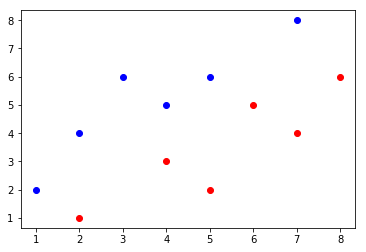

In [2]:
# Plot Samples
plot_samples()
plt.show()

Παρακολουθούμε την τιμή **z = w<sub>0</sub> + w<sub>1</sub>x<sub>1</sub> + w<sub>2</sub>x<sub>2</sub>**:
* Αν z>0 τότε η F>0.5 και ενεργοποιείται ο νευρώνας (κλάση 1)
* Αν z<0 τότε η F<0.5 και δεν ενεργοποιείται ο νευρώνας (κλάση 0)

Τα βήματα της εκπαίδευσης έχουν ως εξής:

#### 1. ΟΡΓΑΝΩΝΟΥΜΕ ΤΑ ΔΕΙΓΜΑΤΑ ΕΚΠΑΙΔΕΥΣΗΣ

Είναι σημαντικό να ανακατεύουμε τα δεδομένα.

In [6]:
# Every sample defined as [x1,x2,label]
samples = np.array([[2,1,0],[5,2,0],[7,4,0],[6,5,0],[4,3,0],[8,6,0],
                    [1,2,1],[4,5,1],[7,8,1],[5,6,1],[3,6,1],[2,4,1]])
classes = ['κόκκινη','μπλε']
np.random.shuffle(samples)
print('[x1,x2,label]')
print(samples)

[x1,x2,label]
[[2 4 1]
 [5 2 0]
 [1 2 1]
 [4 3 0]
 [7 4 0]
 [5 6 1]
 [3 6 1]
 [4 5 1]
 [7 8 1]
 [8 6 0]
 [6 5 0]
 [2 1 0]]


####  2. ΑΡΧΙΚΟΠΟΙΟΥΜΕ ΤΙΣ ΠΑΡΑΜΕΤΡΟΥΣ (**w**)

Κακή αρχικοποίηση καθυστερεί, μειώνει την απόδοση ή καθιστά αδύνατη την σύγκλιση.

[ w0 ,w1 ,w2 ] = [-8, 1, 1.4]


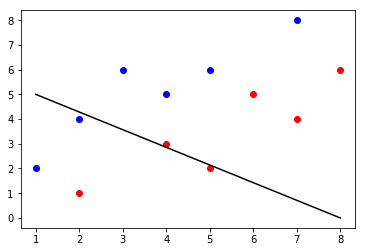

In [7]:
#weight+s = np.random.random(3)
weights = [-8,1,1.4]
print('[ w0 ,w1 ,w2 ] = '+str(weights))
plot_samples(True,weights)
plt.show()

#### 3. ΕΙΣΑΓΟΥΜΕ ΤΟ ΠΡΩΤΟ ΔΕΙΓΜΑ

Υλοποιούμε την πράξη: w<sub>0</sub> + w<sub>1</sub>x<sub>1</sub> + w<sub>2</sub>x<sub>2</sub> 

Αν το σημείο είναι πάνω από τη γραμμή του νευρώνα το αποτέλεσμα είναι θετικό, διαφορετικά προκύπτει αρνητικό. Στην οριακή περίπτωση που ανήκει στην γραμμή το αποτέλεσμα είναι μηδενικό. 

Δείγμα 0: [2 4 1]


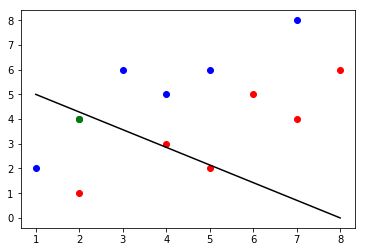

z = -0.40000000000000036 και η έξοδος του νευρώνα: y = 0.40131233988754794
Συνεπώς, ο νευρώνας κατηγοριοποιεί το δείγμα 0 στην κόκκινη κλάση.
Λανθασμένη υπόδειξη!


In [8]:
# Insert First Sample
i = 0
print('Δείγμα '+str(i)+': '+str(samples[i]))
plot_samples(True,weights,samples[i][0:2])
plt.show()

z = np.zeros(np.shape(samples)[0])
z[i] = weights[1]*samples[i][0] + weights[2]*samples[i][1] + weights[0]

def sigmoid(z):
    return 1/(1+np.exp(-z))

y = np.zeros(np.shape(samples)[0])
y[i] = sigmoid(z[i])
print('z = '+str(z[i])+' και η έξοδος του νευρώνα: y = '+str(y[i]))

print('Συνεπώς, ο νευρώνας κατηγοριοποιεί το δείγμα '+str(i)+' στην '+str(classes[int(round(y[i]))])+' κλάση.')
print(str( check_accuracy(int(round(y[i])),samples[i][2]) )+' υπόδειξη!')

#### 4. ΥΠΟΛΟΓΙΖΟΥΜΕ ΤΟ ΣΦΑΛΜΑ

Εισάγουμε την έξοδο του νευρώνα, αλλά και την πραγματική τιμή του δείγματος σε μία συνάρτηση κόστους. Η πιο απλή είναι η τετραγωνική διαφορά:
$$
\begin{align*}
J(y)=\frac{1}{2}(y-label)^2
\end{align*}
$$
Θέλουμε η έξοδος να προσεγγίζει τις τιμές 0,1 όχι απλά να προβλέπει τις κλάσεις. Στην περίπτωσή μας έχουμε:

In [9]:
# Calclate loss
def loss_function(y,label):
    return 1/2*np.power((y-label),2)

loss = np.zeros(np.shape(samples)[0])
loss[i] = loss_function(y[i],samples[i][2])
print('Σφάλμα για το δείγμα '+str(i)+':   loss = '+str(loss[i]))

Σφάλμα για το δείγμα 0:   loss = 0.17921345718546142


#### 5. ΕΠΑΝΑΛΑΜΒΑΝΟΥΜΕ ΤΑ ΒΗΜΑΤΑ 3 & 4 ΓΙΑ ΟΛΑ ΤΑ ΔΕΙΓΜΑΤΑ

Αθροίζουμε τα σφάλματα και υπολογίζουμε το συνολικό σφάλμα του συστήματος

In [10]:
# Calculate loss of all Samples
for i in range(0,np.shape(samples)[0]):
    
    z[i] = weights[1]*samples[i][0] + weights[2]*samples[i][1] + weights[0]
    y[i] = sigmoid(z[i])
    loss[i] = loss_function(y[i],samples[i][2])
    
    print('Δείγμα '+str(i)+': '+str(samples[i]))
    print('Έξοδος νευρώνα: y = '+str(round(y[i],5))+'. '+str( check_accuracy(int(round(y[i])),samples[i][2]) )+' υπόδειξη!')
    print('Σφάλμα: loss = '+str(round(loss[i],10)))

total_loss = np.sum(loss)
print('\nΣυνολικό Σφάλμα: '+str(total_loss))

Δείγμα 0: [2 4 1]
Έξοδος νευρώνα: y = 0.40131. Λανθασμένη υπόδειξη!
Σφάλμα: loss = 0.1792134572
Δείγμα 1: [5 2 0]
Έξοδος νευρώνα: y = 0.45017. Σωστή υπόδειξη!
Σφάλμα: loss = 0.101324715
Δείγμα 2: [1 2 1]
Έξοδος νευρώνα: y = 0.01477. Λανθασμένη υπόδειξη!
Σφάλμα: loss = 0.4853351043
Δείγμα 3: [4 3 0]
Έξοδος νευρώνα: y = 0.54983. Λανθασμένη υπόδειξη!
Σφάλμα: loss = 0.1511587123
Δείγμα 4: [7 4 0]
Έξοδος νευρώνα: y = 0.99005. Λανθασμένη υπόδειξη!
Σφάλμα: loss = 0.4900977173
Δείγμα 5: [5 6 1]
Έξοδος νευρώνα: y = 0.9955. Σωστή υπόδειξη!
Σφάλμα: loss = 1.01082e-05
Δείγμα 6: [3 6 1]
Έξοδος νευρώνα: y = 0.9677. Σωστή υπόδειξη!
Σφάλμα: loss = 0.0005214985
Δείγμα 7: [4 5 1]
Έξοδος νευρώνα: y = 0.95257. Σωστή υπόδειξη!
Σφάλμα: loss = 0.0011246067
Δείγμα 8: [7 8 1]
Έξοδος νευρώνα: y = 0.99996. Σωστή υπόδειξη!
Σφάλμα: loss = 7e-10
Δείγμα 9: [8 6 0]
Έξοδος νευρώνα: y = 0.99978. Λανθασμένη υπόδειξη!
Σφάλμα: loss = 0.4997752085
Δείγμα 10: [6 5 0]
Έξοδος νευρώνα: y = 0.99331. Λανθασμένη υπόδειξη!
Σφάλμα:

#### 6. ΔΙΟΡΘΩΝΟΥΜΕ ΤΙΣ ΠΑΡΑΜΕΤΡΟΥΣ ΜΑΣ ΜΕΣΗ ΤΗΣ ΜΕΘΟΔΟΥ: **GRADIENT DESCENT**

2D|3D
-|-
<img src="https://raw.githubusercontent.com/IoannisKansizoglou/DeepLectures/master/images/\LossFunction.png" width="100%">|<img src="https://raw.githubusercontent.com/IoannisKansizoglou/DeepLectures/master/images/\LossFunction3D.png" width="100%">

Τα βάρη διορθώνονται μέσω της:
$$
\begin{align*}
w_i = w_i - \alpha\frac{\partial J}{\partial w_i}
\end{align*}
$$
Συνεπώς, υπολογίζουμε μερικές παραγώγους της συνάρτησης κόστους. 


[w0,w1,w2] = [-8, 1, 1.4]
[w0',w1',w2'] = [-8.010284377556651, 0.9102333729710631, 1.391632618150986]


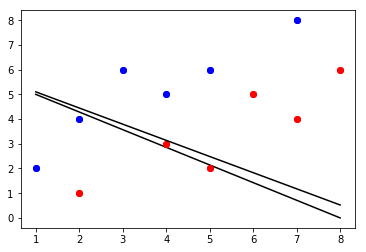

In [14]:
# Update weights
def der_sigmoid(z):
    return sigmoid(z)*(1-sigmoid(z))

def der_loss_function(y,label):
    return y-label

alpha = 0.1
weights = [-8,1,1.4]
plot_samples(True,weights)
print('[w0,w1,w2] = '+str(weights))

w0_gradient = der_loss_function(y,samples[:,2].copy())*der_sigmoid(z)
weights[0] = weights[0] - alpha*np.sum( w0_gradient )
weights[1] = weights[1] - alpha*np.sum( w0_gradient*samples[:,0] )
weights[2] = weights[2] - alpha*np.sum( w0_gradient*samples[:,1] )
print('[w0\',w1\',w2\'] = '+str(weights))
plot_samples(True,weights)

#### ΑΣ ΕΚΤΕΛΕΣΟΥΜΕ ΟΛΟΚΛΗΡΩΜΕΝΑ ΤΗΝ ΕΚΠΑΙΔΕΥΣΗ

Κάθε επανάληψη, η οποία ορίζεται από την εισαγωγή του πρώτου μέχρι και του τελευταίου δείγματος εκπαίδευσης συμπεριλαμβάνοντας και την εφαρμογή του αλγορίθμου Gradient Descent, ονομάζεται **epoch**.

Εκτελούμε την εκπαίδευση για προκαθορισμένο αριθμό epochs, είτε επαναλαμβάνουμε μέχρι το σφάλμα εκπαίδευσης να ελλατωθεί κάτω από ένα επιθυμητό επίπεδο.

Έστω ότι θέλουμε το σφάλμα να γίνει μικρότερο από 0.5


Epoch_0 Συνολικό Σφάλμα: 2.4019401941538843

Epoch_1 Συνολικό Σφάλμα: 2.329520702681356

Epoch_2 Συνολικό Σφάλμα: 2.284788997951755

Epoch_3 Συνολικό Σφάλμα: 2.2504521846307064

Epoch_4 Συνολικό Σφάλμα: 2.218260766279002

Epoch_5 Συνολικό Σφάλμα: 2.1825972045368642

Epoch_6 Συνολικό Σφάλμα: 2.135130764910242

Epoch_7 Συνολικό Σφάλμα: 2.0569776607674903

Epoch_8 Συνολικό Σφάλμα: 1.9137837360993017

Epoch_9 Συνολικό Σφάλμα: 1.7417388516962924

Epoch_10 Συνολικό Σφάλμα: 1.6559872587200808

Epoch_11 Συνολικό Σφάλμα: 1.598489450678168

Epoch_12 Συνολικό Σφάλμα: 1.5450934020554343

Epoch_13 Συνολικό Σφάλμα: 1.4944442982910877

Epoch_14 Συνολικό Σφάλμα: 1.4463113483355126

Epoch_15 Συνολικό Σφάλμα: 1.4005378570574605

Epoch_16 Συνολικό Σφάλμα: 1.356942748507121

Epoch_17 Συνολικό Σφάλμα: 1.3153097181326945

Epoch_18 Συνολικό Σφάλμα: 1.2754070019363857

Epoch_19 Συνολικό Σφάλμα: 1.2370120469990398

Epoch_20 Συνολικό Σφάλμα: 1.19993126696775

Epoch_21 Συνολικό Σφάλμα: 1.1640123997364527

Epoch


Epoch_182 Συνολικό Σφάλμα: 0.339305462996707

Epoch_183 Συνολικό Σφάλμα: 0.3368698414967586

Epoch_184 Συνολικό Σφάλμα: 0.33440261614669925

Epoch_185 Συνολικό Σφάλμα: 0.331903899886416

Epoch_186 Συνολικό Σφάλμα: 0.32937386320162765

Epoch_187 Συνολικό Σφάλμα: 0.326812736348889

Epoch_188 Συνολικό Σφάλμα: 0.3242208114461237

Epoch_189 Συνολικό Σφάλμα: 0.32159844440464924

Epoch_190 Συνολικό Σφάλμα: 0.3189460566781937

Epoch_191 Συνολικό Σφάλμα: 0.316264136804204

Epoch_192 Συνολικό Σφάλμα: 0.31355324171284477

Epoch_193 Συνολικό Σφάλμα: 0.31081399777950264

Epoch_194 Συνολικό Σφάλμα: 0.3080471015973793

Epoch_195 Συνολικό Σφάλμα: 0.3052533204478914

Epoch_196 Συνολικό Σφάλμα: 0.30243349244810785

Epoch_197 Συνολικό Σφάλμα: 0.29958852635637284

Epoch_198 Συνολικό Σφάλμα: 0.2967194010195553

Epoch_199 Συνολικό Σφάλμα: 0.2938271644480562

Epoch_200 Συνολικό Σφάλμα: 0.29091293250775996

Epoch_201 Συνολικό Σφάλμα: 0.2879778872215058

Epoch_202 Συνολικό Σφάλμα: 0.28502327467636407

Epoch_2


Epoch_355 Συνολικό Σφάλμα: 0.044140089163201716

Epoch_356 Συνολικό Σφάλμα: 0.04377211102083117

Epoch_357 Συνολικό Σφάλμα: 0.04340928276039634

Epoch_358 Συνολικό Σφάλμα: 0.04305150880255616

Epoch_359 Συνολικό Σφάλμα: 0.04269869568007735

Epoch_360 Συνολικό Σφάλμα: 0.04235075198643564

Epoch_361 Συνολικό Σφάλμα: 0.042007588325671884

Epoch_362 Συνολικό Σφάλμα: 0.04166911726348148

Epoch_363 Συνολικό Σφάλμα: 0.04133525327950885

Epoch_364 Συνολικό Σφάλμα: 0.041005912720824496

Epoch_365 Συνολικό Σφάλμα: 0.040681013756558

Epoch_366 Συνολικό Σφάλμα: 0.04036047633366366

Epoch_367 Συνολικό Σφάλμα: 0.040044222133792357

Epoch_368 Συνολικό Σφάλμα: 0.039732174531246514

Epoch_369 Συνολικό Σφάλμα: 0.039424258551993066

Epoch_370 Συνολικό Σφάλμα: 0.03912040083371002

Epoch_371 Συνολικό Σφάλμα: 0.038820529586843615

Epoch_372 Συνολικό Σφάλμα: 0.038524574556651245

Epoch_373 Συνολικό Σφάλμα: 0.03823246698620785

Epoch_374 Συνολικό Σφάλμα: 0.03794413958035274

Epoch_375 Συνολικό Σφάλμα: 0.0376

Epoch_532 Συνολικό Σφάλμα: 0.016257279936927018

Epoch_533 Συνολικό Σφάλμα: 0.01619425938245888

Epoch_534 Συνολικό Σφάλμα: 0.016131685590343968

Epoch_535 Συνολικό Σφάλμα: 0.016069554058529768

Epoch_536 Συνολικό Σφάλμα: 0.01600786034307583

Epoch_537 Συνολικό Σφάλμα: 0.01594660005724673

Epoch_538 Συνολικό Σφάλμα: 0.015885768870621923

Epoch_539 Συνολικό Σφάλμα: 0.015825362508221523

Epoch_540 Συνολικό Σφάλμα: 0.015765376749647765

Epoch_541 Συνολικό Σφάλμα: 0.015705807428242513

Epoch_542 Συνολικό Σφάλμα: 0.015646650430259236

Epoch_543 Συνολικό Σφάλμα: 0.015587901694050119

Epoch_544 Συνολικό Σφάλμα: 0.015529557209267972

Epoch_545 Συνολικό Σφάλμα: 0.015471613016082113

Epoch_546 Συνολικό Σφάλμα: 0.015414065204408144

Epoch_547 Συνολικό Σφάλμα: 0.015356909913151721

Epoch_548 Συνολικό Σφάλμα: 0.015300143329465625

Epoch_549 Συνολικό Σφάλμα: 0.01524376168801964

Epoch_550 Συνολικό Σφάλμα: 0.015187761270283887

Epoch_551 Συνολικό Σφάλμα: 0.015132138403824354

Epoch_552 Συνολικό Σφάλμ

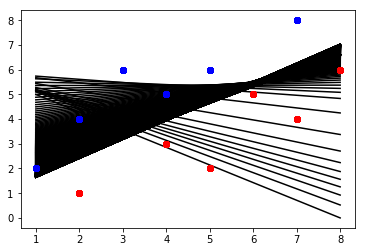

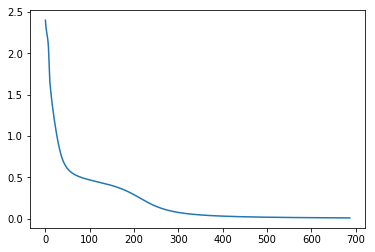

In [37]:
# TRAIN
weights = [-8,1,1.4]

keepTraining = True
epoch = 0
alpha = 0.1
losses = list()

while keepTraining:
    
    for i in range(0,np.shape(samples)[0]):
    
        z[i] = weights[1]*samples[i][0] + weights[2]*samples[i][1] + weights[0]
        y[i] = sigmoid(z[i])
        loss[i] = loss_function(y[i],samples[i][2])
        
    total_loss = np.sum(loss)
    print('\nEpoch_'+str(epoch)+' Συνολικό Σφάλμα: '+str(total_loss))
    plot_samples(True,weights)
    
    w0_gradient = der_loss_function(y,samples[:,2].copy())*der_sigmoid(z)
    weights[0] = weights[0] - alpha*np.sum( w0_gradient )
    weights[1] = weights[1] - alpha*np.sum( w0_gradient*samples[:,0] )
    weights[2] = weights[2] - alpha*np.sum( w0_gradient*samples[:,1] )
    
    if total_loss < 0.01:
        keepTraining = False
    
    losses.append(total_loss)
    epoch += 1

plt.figure()    
plt.plot((np.arange(0,np.shape(losses)[0])),losses)
plt.show()


Και το αποτέλεσμα είναι...

[ w0 ,w1 ,w2 ] = [-4.7664440430506545, -4.193920379177114, 5.452505839107012]


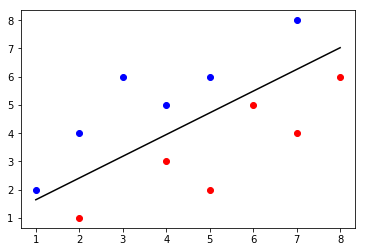

In [38]:
# Print Result
print('[ w0 ,w1 ,w2 ] = '+str(weights))
plot_samples(True,weights)
plt.show()

### Τι σχέση έχουν όλα αυτά με εμάς...



Συνελικτικά νερωνικά δίκτυα (Convolutional Neural Networks - CNNs)

- Με την χρήση **φίλτρων** και την πράξη της συνέλιξης εντοπίζουμε χρήσιμες πληροφορίες (features maps) απευθείας πάνω στην εικόνα.

image matrix size:  (576, 768)


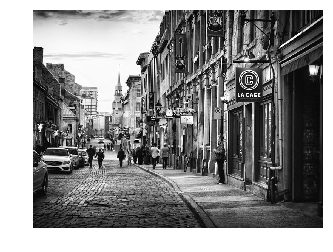

In [35]:
# Insert Image
img = io.imread('Images/road.jpg', as_gray=True)  # load the image as grayscale
print ('image matrix size: ', img.shape)          # print the size of image
plt.imshow(img, cmap='gray')                      # plot the image
plt.axis('off')
plt.show()

Για παράδειγμα εφαρμόζουμε **Edge Detection** για να τονίσουμε τις **κάθετες** ακμές της εικόνας.

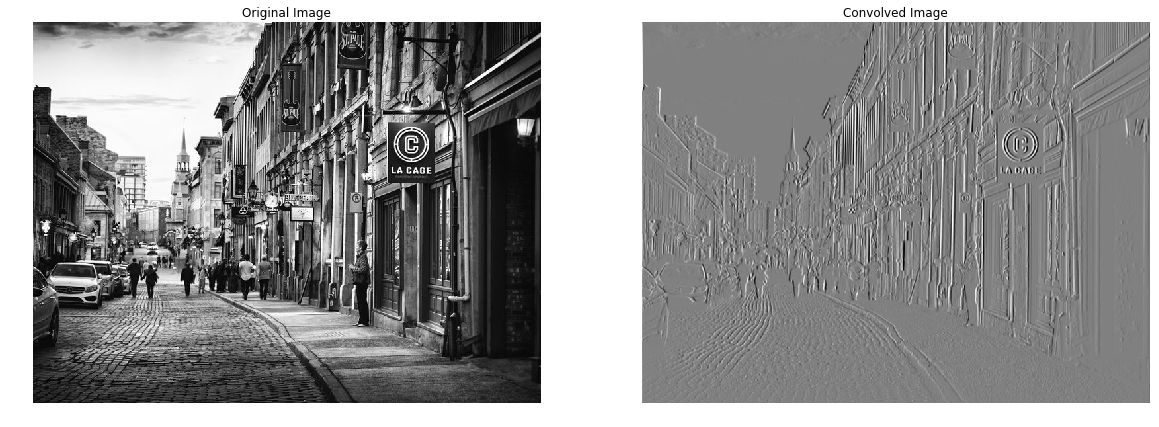

In [36]:
# Convolve the sharpen kernel and the image
kernel = np.array([[1,0,-1], [2,0,-2], [1,0,-1]])
image_sharpen = convolve2d(img,kernel)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=[20,20])
ax1.imshow(img, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.axis('off')
ax2.imshow(image_sharpen, cmap=plt.cm.gray)
ax2.set_title('Convolved Image')
ax2.axis('off')
plt.show()

Τι γίνεται όμως στην περίπτωση που δεν γνωρίζουμε τι είδους ακμές πρέπει να εντοπιστούν για να επιλυθεί ένα πρόβλημα?

- ***ΛΥΣΗ:*** Εκπαιδεύουμε τα φίλτρα για να αποφασίσουνε μόνα τους να εντοπίζουν τα κατάλληλα στοιχεία στην εικόνα.

### CONVOLUTIONAL LAYER

Σε ένα ConvLayer μπορούμε να φανταστούμε τους νευρώνες να έχουν την παρακάτω διάταξη.

A|B
-|-
<img src="https://raw.githubusercontent.com/IoannisKansizoglou/DeepLectures/master/images/tikz44.png" width="100%">|<img src="https://raw.githubusercontent.com/IoannisKansizoglou/DeepLectures/master/images/tikz45.png" width="100%">

Η τιμή κάθε νευρώνα σε αυτά τα επίπεδα προκύπτει από μία τετραγωνική **περιοχή** των νευρώνων του προηγούμενου επιπέδου. Περιέχει δηλαδή χωρική πληροφορία, που χρειάζεται στις εικόνες.

<img src="https://raw.githubusercontent.com/IoannisKansizoglou/DeepLectures/master/images/convolve.png" width="70%">

Η περιοχή αυτή συνελίσσεται με τα φίλτρα του επιπέδου (μπλε τετράγωνο) που περιέχουν τις εκπαιδευόμενες παραμέτρους και παράγουν ορισμένους χάρτες χαρακτηριστικών (***feature maps***). Το μέγεθος του φίλτρου (K) καθορίζει και το μέγεθος της περιοχής.

Στην παραπάνω εικόνα έχουμε σαν είσοδο εικόνα ενός καναλιού π.χ. _grayscale_. Για _RGB_ εικόνες χρειαζόμαστε φίλτρο τριών καναλιών ένα για κάθε χρώμα, όπως φαίνεται παρακάτω:

<img src="https://raw.githubusercontent.com/IoannisKansizoglou/DeepLectures/master/gifs/rgb.gif" width="100%">

<img src="https://raw.githubusercontent.com/IoannisKansizoglou/DeepLectures/master/images/conv.png" width="60%">

Επίσης θέλουμε να αναζητούμε όχι ένα αλλά περισσότερα στοιχεία σε μια εικόνα. Συνεπώς χρησιμοποιούμε πολλαπλά φίλτρα που παράγουν διαφορετικούς feature maps. Τοποθετώντας τους τον ένα πίσω από τον άλλο ορίζουμε το βάθος (**depth**) του επιπέδου.

<img src="https://raw.githubusercontent.com/IoannisKansizoglou/DeepLectures/master/images/conv2.png" width="60%">


#### Βασικά χαρακτηριστικά συνέλιξης εικόνας:

- **Stride (S):** Ο αριθμός των pixels που μετατοπίζεται το φίλτρο στον οριζόντιο ή τον κατακόρυφο άξονα. Παρακάτω S=2 ή [2,2].
- **Padding (P):** Ο αριθμός των pixels που προσθέτουμε γύρω-γύρω από την είσοδο στην κάθε διεύθυνση. Παρακάτω P=1 ή [1,1].

<img src="https://raw.githubusercontent.com/IoannisKansizoglou/DeepLectures/master/gifs/stride2.gif" width="100%">

Το μέγεθος του feature map έχει 3 διαστάσεις [ $ width\times height\times depth $ ] και αντιστοιχεί στον **αριθμό των νευρώνων του επιπέδου**. Οι διαστάσεις καθορίζονται ως:

$$
\begin{align*}
width = \frac{I_w-K_w+2P}{S}+1
\end{align*}
$$

$$
\begin{align*}
height = \frac{I_h-K_h+2P}{S}+1
\end{align*}
$$

$$
\begin{align*}
depth = Number\_of\_filters
\end{align*}
$$

Αντίστοιχα οι διαστάσεις των παραμέτρων του επιπέδου έχουν ως εξής:

$$
\begin{align}
weights = [ K_w \times K_h \times channels \times depth ]
\end{align}
$$

$$
\begin{align}
bias = [ depth ]
\end{align}
$$



***ΠΡΟΣΟΧΗ***: Τα κανάλια (channels) καθορίζονται από τον αριθμό φίλτρων (άρα το depth) του προηγούμενου επιπέδου. 

### POOLING LAYER

Σε ένα PoolLayer απλά κάνουμε μείωση μεγέθους (**downsample**) της εικόνας. Βασικές μέθοδοι pooling είναι: max, min, average. Συνήθως, στα δίκτυα εφαρμόζουμε **max pool**.

***Max Pool:*** Ένα φίλτρο μεγέθους [$K_w \times K_h$]  σαρώνει **ανά μονάδα βάθους (depthwise)** το εισαγόμενο επίπεδο και διατηρεί μόνο την μέγιστη τιμή της κάθε περιοχής.

<img src='https://raw.githubusercontent.com/IoannisKansizoglou/DeepLectures/master/images/max-pooling.png' width='70%'>

Παρόμοια έχουμε:
- **Stride (S)**: Συνήθως S=K ή [$K_w,K_h$] 
- **Padding (P)**: Συνήθως P=0 ή [0,0]

Υπό αυτές τις συνθήκες στην έξοδο προκύπτει feature map μεγέθους: 

$$
[ (\frac{I_w-K_w}{S}+1) \times (\frac{I_h-K_h}{S}+1) \times depth ] = [ \frac{I_w}{K_w} \times \frac{I_h}{K_h} \times depth ]
$$

Για παράδειγμα η παραπάνω εικόνα από $ [ 4\times4\times1 ] $ συμπιέστηκε σε $ [ 2\times2\times1 ] $ pixels. Η μορφή του στις 3 διαστάσεις έχει ως εξής:

<img src='https://raw.githubusercontent.com/IoannisKansizoglou/DeepLectures/master/images/pool2.png' width='70%'>

***ΠΡΟΣΟΧΗ***: Το PoolLayer **δεν** εχει εκπαιδευόμενες παραμέτρους. Μειώνει το μέγεθος του επιπέδου της εισόδου και διατηρεί το βάθος της.

### AlexNet

 Σχεδιάστηκε από τον _Alex Krizhevsky_ και εκπαιδεύτηκε στο _ImageNet_.
  
<img src='https://raw.githubusercontent.com/IoannisKansizoglou/DeepLectures/master/images/AlexNet.png' width='90%'>


_Paper:_ Imagenet classification with deep convolutional neural networks,
_Krizhevsky, Alex and Sutskever, Ilya and Hinton, Geoffrey E, Advances in neural information processing systems, 2012_

<img src='https://raw.githubusercontent.com/IoannisKansizoglou/DeepLectures/master/images/imagenet.jpeg' width='40%'>


~ 14 εκατομμύρια εικόνες

- 1.2 Μ, εικόνες εκπαίδευσης (training)
- 100 K, εικόνες επαλήθευσης (test)
- 1000 κλάσεις

<img src='https://raw.githubusercontent.com/IoannisKansizoglou/DeepLectures/master/images/imagenet2.png' width='80%' align='center'>

### Και τι υπάρχει μέσα σε ένα CNN ?

<img src='https://raw.githubusercontent.com/IoannisKansizoglou/DeepLectures/master/images/kernels.jpeg' width='80%'>

<table>
<tr>
    <th align='center'> Size/Operation </th> 
    <th align='center'> Filter </th>
    <th align='center'> Stride </th>
    <th align='center'> Padding </th>
</tr>
<tr>
    <td align='center'> $ 227\times227\times3 $ </td>
    <td align='center'> - </td>
    <td align='center'> - </td>
    <td align='center'> - </td>
</tr>
<tr>
    <td align='center'> <i>Conv1+ReLU</i> </td>
    <td align='center'> $ 11\times11\times3\times96 $ </td>
    <td align='center'> 4 </td>
    <td align='center'> 0 </td>
</tr>
<tr>
    <td align='center'> $ 55\times55\times96 $ </td>
    <td align='center'> - </td>
    <td align='center'> - </td>
    <td align='center'> - </td>
</tr>
<tr>
    <td align='center'> <i>Max Pool</i> </td>
    <td align='center'> $ 3\times3\times96 $ </td>
    <td align='center'> 2 </td>
    <td align='center'> 0 </td>
</tr>
<tr>
    <td align='center'> $ 27\times27\times96 $ </td>
    <td align='center'> - </td>
    <td align='center'> - </td>
    <td align='center'> - </td>
</tr>
<tr>
    <td align='center'> <i>Conv2+ReLU</i> </td>
    <td align='center'> $ 5\times5\times96\times256 $ </td>
    <td align='center'> 1 </td>
    <td align='center'> 2 </td>
</tr>
<tr>
    <td align='center'> $ 27\times27\times256 $ </td>
    <td align='center'> - </td>
    <td align='center'> - </td>
    <td align='center'> - </td>
</tr>
<tr>
    <td align='center'> <i>Max Pool</i> </td>
    <td align='center'> $ 3\times3\times256 $ </td>
    <td align='center'> 2 </td>
    <td align='center'> 0 </td>
</tr>
<tr>
    <td align='center'> $ 13\times13\times256 $ </td>
    <td align='center'> - </td>
    <td align='center'> - </td>
    <td align='center'> - </td>
</tr>
<tr>
    <td align='center'> <i>Conv3+ReLU</i> </td>
    <td align='center'> $ 3\times3\times256\times384 $ </td>
    <td align='center'> 1 </td>
    <td align='center'> 1 </td>
</tr>
<tr>
    <td align='center'> $ 13\times13\times384 $ </td>
    <td align='center'> - </td>
    <td align='center'> - </td>
    <td align='center'> - </td>
</tr>
<tr>
    <td align='center'> <i>Conv4+ReLU</i> </td>
    <td align='center'> $ 3\times3\times384\times384 $ </td>
    <td align='center'> 1 </td>
    <td align='center'> 1 </td>
</tr>
<tr>
    <td align='center'> $ 13\times13\times384 $ </td>
    <td align='center'> - </td>
    <td align='center'> - </td>
    <td align='center'> - </td>
</tr>
<tr>
    <td align='center'> <i>Conv5+ReLU</i> </td>
    <td align='center'> $ 3\times3\times384\times256 $ </td>
    <td align='center'> 1 </td>
    <td align='center'> 1 </td>
</tr>
<tr>
    <td align='center'> $ 13\times13\times256 $ </td>
    <td align='center'> - </td>
    <td align='center'> - </td>
    <td align='center'> - </td>
</tr>
<tr>
    <td align='center'> <i>Max Pool</i> </td>
    <td align='center'> $ 3\times3\times256 $ </td>
    <td align='center'> 2 </td>
    <td align='center'> 0 </td>
</tr>
<tr>
    <td align='center'> $ 6\times6\times256 $ </td>
    <td align='center'> - </td>
    <td align='center'> - </td>
    <td align='center'> - </td>
</tr>
<tr>
    <td align='center'> <i>FC6+ReLU</i> </td>
    <td align='center'> $ 1\times1\times4096 $ </td>
    <td align='center'> - </td>
    <td align='center'> - </td>
</tr>
<tr>
    <td align='center'> $ 4096 $ </td>
    <td align='center'> - </td>
    <td align='center'> - </td>
    <td align='center'> - </td>
</tr>
<tr>
    <td align='center'> <i>FC7+ReLU</i> </td>
    <td align='center'> $ 1\times1\times4096 $ </td>
    <td align='center'> - </td>
    <td align='center'> - </td>
</tr>
<tr>
    <td align='center'> $ 4096 $ </td>
    <td align='center'> - </td>
    <td align='center'> - </td>
    <td align='center'> - </td>
</tr>
<tr>
    <td align='center'> <i>FC8+ReLU</i> </td>
    <td align='center'> $ 1\times1\times4096 $ </td>
    <td align='center'> - </td>
    <td align='center'> - </td>
</tr>
<tr>
    <td align='center'> $ 1000 $ <i>classes</i> </td>
    <td align='center'> - </td>
    <td align='center'> - </td>
    <td align='center'> - </td>
</tr>
</table>

### References - Sites

1] http://neuralnetworksanddeeplearning.com/

2] http://cs231n.github.io/convolutional-networks/

3] https://anhvnn.wordpress.com/

4] http://machinelearninguru.com/computer_vision/basics/convolution/image_convolution_1.html

5] https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2

6] https://medium.com/@smallfishbigsea/a-walk-through-of-alexnet-6cbd137a5637

7] http://www.image-net.org/
